# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [1]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

### Importando bibliotecas

In [2]:
import seaborn as sns
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [3]:
conn = psycopg2.connect(host="localhost",database="resolve_ae", user="postgres", password="postgres", port= 5433)

## Obtendo dados do database com Pandas

# Relatório 1

### Objetivo: Obter o número de supervisionados de cada supervisor


Código para obtenção do resultado:

In [91]:
test = pd.read_sql_query("""
SELECT TIP.nome AS "QUALIFICACAO",COUNT(DISTINCT S.id)AS "SERVICOS_CADASTRADOS" FROM SERVICO AS S
INNER JOIN USUARIO AS U ON U.id = S.fk_usuario
INNER JOIN info_profissional AS IP ON IP.fk_usuario = U.id
INNER JOIN tipo_info_profissional AS TIP ON TIP.id = IP.fk_tipo_info_prof
WHERE 1=1
AND TIP.id >= 1
AND TIP.ID<=4
GROUP BY TIP.nome
ORDER BY "SERVICOS_CADASTRADOS"
                            """,conn)

In [93]:
test

,QUALIFICACAO,SERVICOS_CADASTRADOS
0,PÓS-GRADUAÇÃO,113680
1,GRADUAÇÃO,114015
2,CURSO TÉCNICO,114188
3,DOMÍNIO TECNOLÓGICO,114250


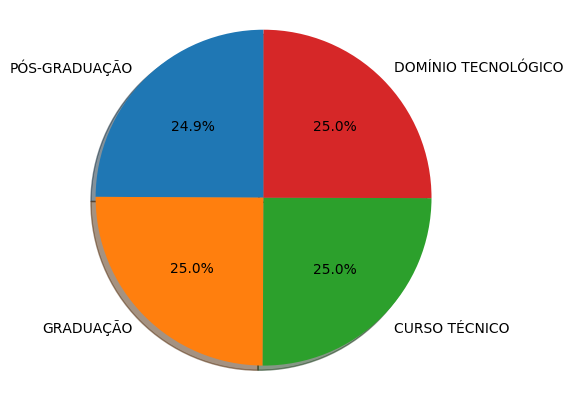

In [95]:
df = pd.DataFrame(test)
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df.QUALIFICACAO
sizes = df.SERVICOS_CADASTRADOS
explode = (0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Relatorio2

### Objetivo: Obter valor médio dos salários por departamento

codigo para obtenção do resultado:

In [27]:
result = pd.read_sql_query("""
SELECT TS.nome, COUNT(DISTINCT S.id) AS "NUMERO_CONTRATOS" FROM usuario AS U
INNER JOIN avaliacao AS A ON A.fk_usuario = U.id
INNER JOIN servico AS S ON S.id = A.fk_servico
INNER JOIN servico_subtipo_servico AS SSS ON SSS.fk_servico = S.id
INNER JOIN subtipo_servico AS SB ON SB.id = SSS.fk_subtipo_servico
INNER JOIN tipo_servico as TS ON TS.id = SB.fk_tipo_servico
INNER JOIN endereco AS E ON E.fk_usuario = U.id
INNER JOIN bairro AS B ON B.id = E.fk_bairro
INNER JOIN cidade AS C ON C.id = B.fk_cidade
INNER JOIN estado AS UF ON UF.id = C.fk_estado
WHERE UF.id = 2
GROUP BY TS.nome
ORDER BY "NUMERO_CONTRATOS"


                            """,conn)

In [28]:
result

,nome,NUMERO_CONTRATOS
0,Banco de Dados,539
1,Desenvolvimento,550
2,Design,573
3,Análise de Sistemas,589
4,Infraestrutura,614


Alternativamente podemos aplicar estilos a tabela para melhor formatação usando pandas e seaborn

In [29]:
df = pd.DataFrame(result)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)


,nome,NUMERO_CONTRATOS
0,Banco de Dados,539
1,Desenvolvimento,550
2,Design,573
3,Análise de Sistemas,589
4,Infraestrutura,614


Podemos também utilizar o matplotlib que é instalado por padrão com o seaborn

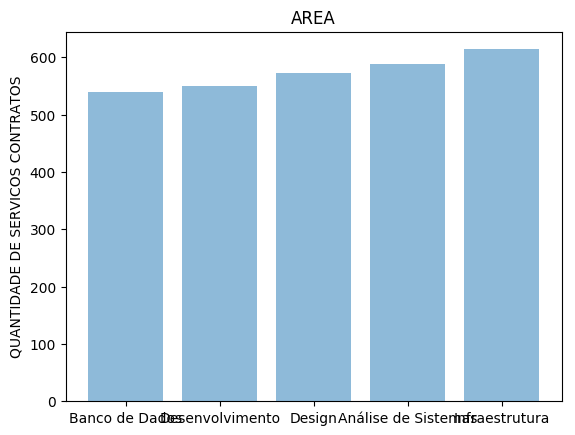

In [31]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.nome)
y_pos = np.arange(len(objects))
performance = list(df.NUMERO_CONTRATOS)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('QUANTIDADE DE SERVICOS CONTRATOS')
plt.title('AREA - ALAGOAS')
 
plt.show()

References

## Relatório 3

### Objetivo: Obtenção de aumento de custo de 20% ao ano por funcionário

codigo para obtenção do resultado:

In [36]:
result = pd.read_sql_query("""
SELECT UF.NOME, COUNT(DISTINCT S.id) AS "TOTAL_SERVICOS" FROM estado AS UF
INNER JOIN cidade AS C ON C.fk_estado = UF.id
INNER JOIN bairro AS B ON B.fk_cidade = C.id
INNER JOIN endereco AS E ON E.fk_bairro = B.id
INNER JOIN usuario AS U ON E.fk_usuario = U.id
INNER JOIN servico AS S ON S.fk_usuario = U.id
INNER JOIN servico_subtipo_servico AS SSS ON SSS.fk_servico = S.id
INNER JOIN subtipo_servico AS SB ON SB.ID = SSS.fk_subtipo_servico
INNER JOIN tipo_servico AS TS ON TS.id = SB.fk_tipo_servico
WHERE TS.ID = 2
GROUP BY UF.nome
ORDER BY "TOTAL_SERVICOS" DESC,UF.nome DESC

                            """,conn)

In [37]:
print("CONTRATACOES DA AREA DE BANCO DE DADOS")
result

CONTRATACOES DA AREA DE BANCO DE DADOS


,nome,TOTAL_SERVICOS
0,Rio Grande do Sul,26523
1,Santa Catarina,18248
2,Ceará,17454
3,São Paulo,10890
4,Minas Gerais,9561
5,Paraná,6913
6,Pernambuco,5977
7,Mato Grosso,4475
8,Espírito Santo,4246
9,Amazonas,4214


## Relatório 4

### Objetivo: Obter valor total gasto com salários por departamento, média de valor salarial por departamento, total de horas de trabalho por departamento, e media de horas de trabalho por departamento 

codigo para obtenção do resultado:

In [42]:
result = pd.read_sql_query("""
SELECT TS.nome AS "AREA", SUM(A.nota)/COUNT(TS.*) AS "MEDIA_AREA", COUNT(A.id) AS "NUMERO_AVALIACOES", SUM(A.nota) AS "SOMA_NOTAS" FROM tipo_servico AS TS
INNER JOIN subtipo_servico AS SB ON SB.fk_tipo_servico = TS.id
INNER JOIN servico_subtipo_servico AS SSS ON SSS.fk_subtipo_servico = SB.id
INNER JOIN servico AS S ON S.id = SSS.fk_servico
INNER JOIN avaliacao AS A ON A.fk_servico = S.id
GROUP BY TS.nome
ORDER BY "MEDIA_AREA" DESC
                            """,conn)

In [43]:
result

,AREA,MEDIA_AREA,NUMERO_AVALIACOES,SOMA_NOTAS
0,Banco de Dados,3,132638,398477
1,Design,3,133106,400156
2,Infraestrutura,3,133337,400038
3,Análise de Sistemas,2,133065,399156
4,Desenvolvimento,2,132922,398497


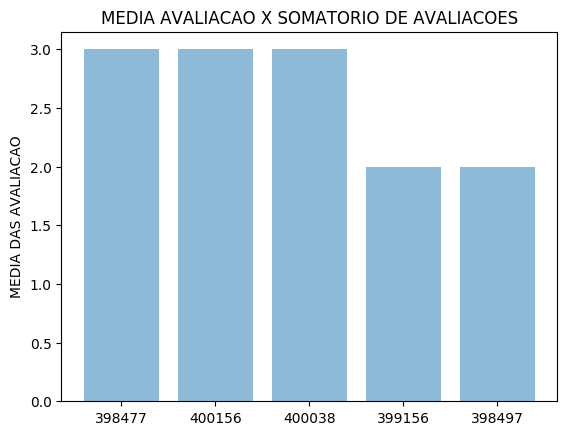

In [82]:
df = pd.DataFrame(result)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.SOMA_NOTAS)
y_pos = np.arange(len(objects))
performance = list(df.MEDIA_AREA)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('MEDIA DAS AVALIACAO')
plt.title('MEDIA AVALIACAO X SOMATORIO DE AVALIACOES')
 
plt.show()

In [45]:
df.columns

Index(['AREA', 'MEDIA_AREA', 'NUMERO_AVALIACOES', 'SOMA_NOTAS'], dtype='object')

In [87]:
df

,AREA,MEDIA_AREA,NUMERO_AVALIACOES,SOMA_NOTAS
0,Banco de Dados,3,132638,398477
1,Design,3,133106,400156
2,Infraestrutura,3,133337,400038
3,Análise de Sistemas,2,133065,399156
4,Desenvolvimento,2,132922,398497


# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>